# vision

## libriries 
- torch vision
- torchvision.datasets
- torchvision.models
- torchvision.models
- torch.vision.transforms
- torch.utils.data.Dataset
- torch.utils.data.Dataloader


In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


## getting a dataset

In [29]:
# get training data
train_data = datasets.FashionMNIST(
    root='data', #ehere to download data too 
    train=True, 
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root='data', #ehere to download data too 
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:22<00:00, 1187640.98it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 177259.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 745655.66it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9959537.36it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

## become one with the data

image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

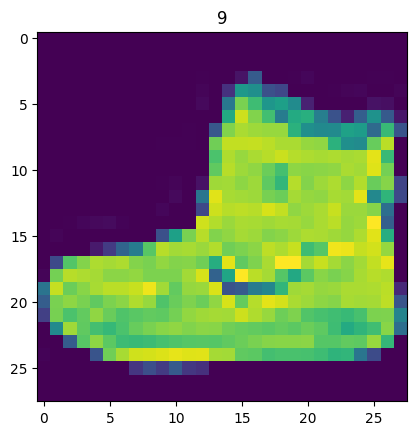

In [8]:
# input shape NCHW
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'image shape {image.shape}')
show_img = torch.permute(image, (1,2,0))
plt.imshow(show_img)
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

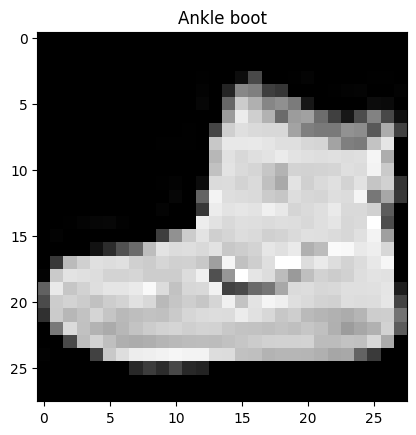

In [9]:
plt.imshow(show_img, cmap='gray')
plt.title(class_names[label])

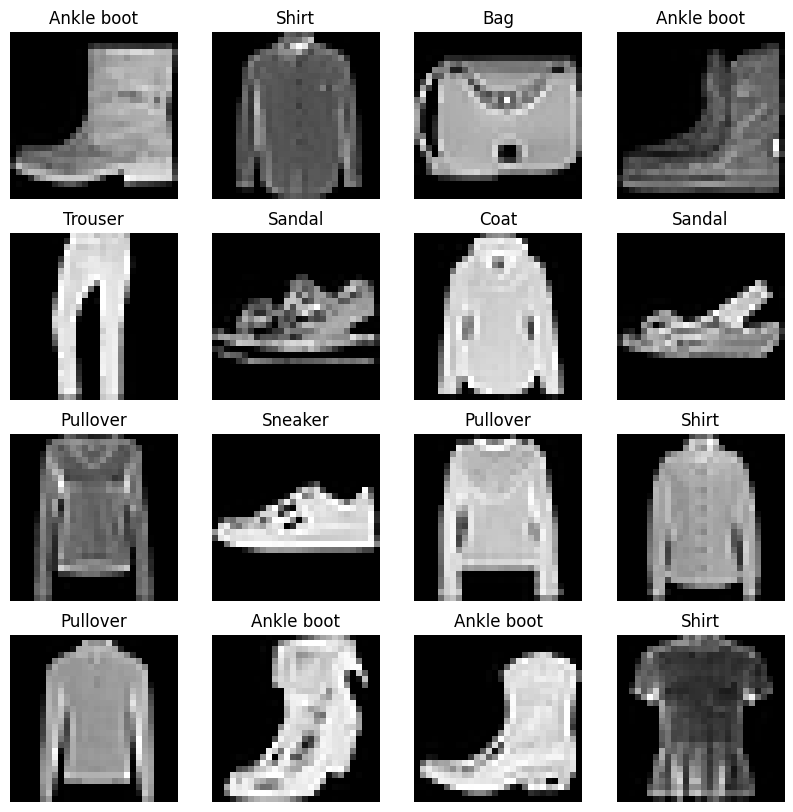

In [10]:
torch.manual_seed(42)
fig, ax = plt.subplots(4, 4)
fig.set_figheight(10)
fig.set_figwidth(10)
for i in range(4):
    for j in range(4):
        rand_int = torch.randint(len(train_data), size=[1])
        img, label = train_data[rand_int.item()]
        ax[i][j].imshow(img.squeeze(), cmap='gray')
        ax[i][j].set_title(class_names[label])
        ax[i][j].axis(False)
        
        


## dataloader

our data is in the form of a pytorch dataset

dataloader tuens out dataset into a python iterable 

we want to use batches 

1. more computationaly effiecent so we break it down to 32 images at a time 

2. gives more of a chance to update batch per epoch

we want to shuffle data in case data is ordered
look at 32 samples per batch

In [11]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [30]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_load = DataLoader(train_data, batch_size = 32, shuffle=True)
test_load = DataLoader(test_data, batch_size = 32, shuffle=True)

train_load, test_load

(<torch.utils.data.dataloader.DataLoader at 0x2b2663650>,
 <torch.utils.data.dataloader.DataLoader at 0x2b3604390>)

In [31]:
print(f'shape train {len(train_load)}, shape test {len(test_load)}')

shape train 1875, shape test 313


In [32]:
train_features_batch, train_lables_batch = next(iter(train_load))
train_features_batch.shape, train_lables_batch.shape 



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [33]:
test_features_batch, test_lables_batch = next(iter(test_load))
test_features_batch.shape, test_lables_batch.shape 



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

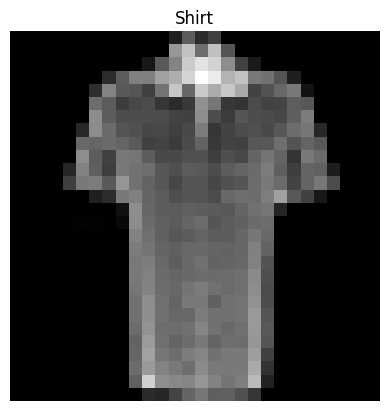

In [15]:
# see a sample
torch.manual_seed(42)
random_idx = torch.randint(len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_lables_batch[random_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## build a baseline model 
when starting with ml you start with a basic model. Start simple and add more in continously



In [16]:
# create a flatten model 
flatten_model = nn.Flatten()

# gets first batch
x = train_features_batch[0]

output = flatten_model(x)

# combines height and width
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [45]:
from torch import nn

class basic_img_model(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hiddem_units: int, 
                 output_shape: int
                 ) -> None:
        super().__init__()
        
        self.seq = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hiddem_units),
            nn.Linear(in_features=hiddem_units, out_features=output_shape)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

In [46]:
torch.manual_seed(42)

model_0 = basic_img_model(784, hiddem_units=1024, output_shape=10)
model_0

basic_img_model(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [47]:
model_0.state_dict()

OrderedDict([('seq.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [ 0.0029, -0.0017, -0.0308,  ..., -0.0039, -0.0194,  0.0052],
                      [ 0.0169,  0.0135,  0.0022,  ...,  0.0038, -0.0337, -0.0060],
                      [ 0.0180,  0.0354,  0.0271,  ..., -0.0025,  0.0082, -0.0356]])),
             ('seq.1.bias',
              tensor([ 0.0019,  0.0277, -0.0168,  ...,  0.0031,  0.0299,  0.0289])),
             ('seq.2.weight',
              tensor([[ 0.0177,  0.0303, -0.0080,  ...,  0.0173,  0.0033,  0.0073],
                      [-0.0055, -0.0084,  0.0290,  ..., -0.0237,  0.0116, -0.0191],
                      [-0.0157,  0.0305, -0.0039,  ...,  0.0258, -0.0199,  0.0046],
                      ...,
              

In [48]:
from torchmetrics.classification import MulticlassAccuracy

# define optim and loss
loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters(), lr=.01)

ac_fn = MulticlassAccuracy(10)

### create a function to time our expronments 

In [49]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device:torch.device = None):
    total_time = end - start
    print(f'train time on device {device}: {total_time} sec:')

### train model on batches of data

1. Loop through epochs
2. loop through training bathces, perform training steps and calc loss per batch

3. loop through testing batches 
4. print out shit 
5. time!

In [69]:
from tqdm.auto import tqdm

# set the seed and start the timer 
torch.manual_seed(42)

train_time_start_cpu = timer()

epochs = 3

# wrap iterator in tqdm 

for epoch in tqdm(range(epochs)):
    print(f'Epoch {epoch}\n------')
    
    train_loss = 0
    # accumulate and then devide by n loops 
    model_0.train()
    for batch, (X, y) in enumerate(train_load):
        y_pred = model_0(X)
        batch_loss = loss_fn(y_pred, y)
        train_loss += batch_loss
        optim.zero_grad()
        batch_loss.backward()
        optim.step()
        
        if batch % 400 == 0:
            print(f'Batch {batch}, Loss {batch_loss}')
    
    train_loss /= len(train_load)
    
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.no_grad():
        for X_test, y_test in test_load:
            y_pred_test = model_0(X_test)
            loss = loss_fn(y_pred_test, y_test)
            test_loss += loss
            
            test_acc += ac_fn(y_pred_test, y_test)
            
    test_loss /= len(test_load)
    test_acc /= len(test_load)        
    
    print(f'\nTrain loss: {train_loss} || Test Loss: {test_loss} || Test Ac || {test_acc}')
        

           
        


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------
Batch 0, Loss 2.3289451599121094
Batch 400, Loss 0.2474149912595749
Batch 800, Loss 3.619621515274048
Batch 1200, Loss 2.1810784339904785
Batch 1600, Loss 0.9830588102340698

Train loss: 3.5225656032562256 || Test Loss: 2.6713311672210693 || Test Ac || 0.7661647200584412
Epoch 1
------
Batch 0, Loss 3.338571786880493
Batch 400, Loss 6.2523932456970215
Batch 800, Loss 1.0817465782165527
Batch 1200, Loss 1.1569066047668457
Batch 1600, Loss 1.3600878715515137

Train loss: 3.4344253540039062 || Test Loss: 4.464177131652832 || Test Ac || 0.7421204447746277
Epoch 2
------
Batch 0, Loss 2.6297643184661865
Batch 400, Loss 2.6147847175598145
Batch 800, Loss 2.5386104583740234
Batch 1200, Loss 6.157913684844971


KeyboardInterrupt: 

In [57]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, 
              ac_fn, ):
    """returns a dict of model results on dataloader

    Args:
        model (torch.nn.Module): _description_
        data_loader (torch.utils.data.Dataloader): _description_
        loss (torch.nn.Module): _description_
        ac_fn (_type_): _description_
    """
    
    loss, ac = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in (data_loader):
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            ac += ac_fn(y_pred, y)
        ac /= len(data_loader)
        loss /= len(data_loader)
    
    return {"loss": loss.item(), "ac": ac.item()}

## eval model!

In [58]:
model_0_results = eval_model(model=model_0, data_loader=test_load, loss_fn=loss_fn, ac_fn=ac_fn)
model_0_results

{'loss': 2.6377017498016357, 'ac': 0.7807586193084717}

## Improve through expirmentation 

In [61]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [101]:
class nonLinearImgRegressor(nn.Module):
    def __init__(self, input_layer, hidden_units, output_layer) -> None:
        super().__init__()
        
        self.seq = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_layer, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_layer),
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.seq(x)

In [102]:
model_1 = nonLinearImgRegressor(784, hidden_units=1024, output_layer=10)
optim = torch.optim.Adam(params=model_1.parameters(), lr=.01)
loss_fn = torch.nn.CrossEntropyLoss()
model_1

nonLinearImgRegressor(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [103]:
epochs = 3 

for epoch in tqdm(range(epochs)):
    
    loss = 0
    model_1.train()
    for batch, (X, y) in enumerate(train_load):        
        y_pred = model_1(X)
        batch_loss = loss_fn(y_pred, y)
        optim.zero_grad()
        batch_loss.backward()
        optim.step()
        loss += batch_loss    
    loss /= len(train_load)
        
    test_loss, test_ac = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_load:
            y_pred_test = model_1(X_test)
            test_loss += loss_fn(y_pred_test, y_test)
            test_ac += ac_fn(y_pred_test, y_test)
        test_loss /= len(test_load)
        test_ac /= len(test_load)
    
    print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss} || Test ac {test_ac}')

            
        

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 || Loss 0.5480870604515076 || Test Loss 0.4621439278125763 || Test ac 0.8199619650840759
Epoch 1 || Loss 0.43827977776527405 || Test Loss 0.5067363381385803 || Test ac 0.8246941566467285
Epoch 2 || Loss 0.41594892740249634 || Test Loss 0.4728981852531433 || Test ac 0.8301888704299927


## funcitonize!

In [104]:
import torch.utils
import torch.utils.data


def train_step(model=nn.Module, 
               data_loader=torch.utils.data.DataLoader, 
               optim=torch.optim, 
               loss_fn=torch.nn):
    loss = 0
    model_1.train()
    for X, y in data_loader:
        y_pred = model(X)
        batch_loss = loss_fn(y_pred, y)
        optim.zero_grad()
        batch_loss.backward()
        optim.step()
        loss += batch_loss  
        
    return loss/len(data_loader)

In [113]:
def test_step(model=nn.Module, 
              data_loader=torch.utils.data.DataLoader,
              loss_fn=torch.nn, ac_fn=None):
    test_loss, test_ac = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            y_pred_test = model_1(X_test)
            test_loss += loss_fn(y_pred_test, y_test)
            test_ac += ac_fn(y_pred_test, y_test)
        test_loss /= len(data_loader)
        test_ac /= len(data_loader)
    return {'test_loss': test_loss.item(), 'test_ac': test_ac.item()}

In [114]:
epochs = 3 

for epoch in tqdm(range(epochs)):
    
    loss = train_step(model=model_1, data_loader=train_load, optim=optim, loss_fn=loss_fn)
    test_metrics = test_step(model=model_1, data_loader=train_load, loss_fn=loss_fn, ac_fn=ac_fn)
    
    test_loss, test_ac = test_metrics['test_loss'], test_metrics['test_ac']
    
    print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss} || Test ac {test_ac}')


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0 || Loss 0.36933016777038574 || Test Loss 0.3484581410884857 || Test ac 0.865742564201355
Epoch 1 || Loss 0.36461901664733887 || Test Loss 0.33683398365974426 || Test ac 0.8689592480659485
Epoch 2 || Loss 0.36601755023002625 || Test Loss 0.359201580286026 || Test ac 0.8639836311340332


In [116]:
model_1_eval = eval_model(data_loader=test_load, loss_fn=loss_fn, ac_fn=ac_fn, model=model_1)
model_1_eval

{'loss': 0.483315110206604, 'ac': 0.8356471657752991}

## Create CNN

In [211]:
class FashionCNN(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape: int) -> None:
        super().__init__()
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )  
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.output = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*49, out_features=output_shape)
        )
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        out1 = self.conv_block1(x)
        #print(out1.shape)
        out2 = self.conv_block2(out1)
        #print(out2.shape)
        return self.output(out2)
        

In [212]:
image.shape

torch.Size([1, 28, 28])

In [213]:
torch.manual_seed(42)
model_2 = FashionCNN(input_shape=1, hidden_units=10, output_shape=10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 0.2024, -0.2504, -0.0134,  ...,  0.2792, -0.3610, -0.2566],
         [-0.0764, -0.7191,  0.2984,  ...,  0.3615,  0.6315,  0.6595],
         [-0.2137, -0.3899,  0.1102,  ...,  0.3512,  0.6649,  0.0560],
         ...,
         [-0.4276,  0.1331, -0.8694,  ...,  1.1234,  0.0140, -0.9160],
         [ 0.1783, -0.2661,  0.4148,  ..., -1.0826, -0.3362, -0.5056],
         [-0.3468, -0.0785, -0.4956,  ...,  0.8305,  0.7456,  0.5456]],

        [[-0.5006,  0.4476, -0.1052,  ...,  0.3670, -0.0945,  0.3401],
         [ 0.2966,  0.5690,  0.5389,  ...,  0.1746,  0.2696, -0.1404],
         [-0.3154,  0.5931, -0.1658,  ...,  0.6388, -0.2363, -0.0625],
         ...,
         [ 0.4414, -1.0194,  0.8830,  ...,  0.1321, -0.3717,  0.3900],
         [ 0.9789, -0.2282, -0.4580,  ...,  0.6974, -0.1458,  0.0690],
         [-0.5247,  0.3804, -0.6464,  ...,  0.4280, -0.1108, -0.0864]],

        [[ 0.1514, -0.4079,  0.3463,  ...,  0.2544, -0.4861, -0.5154],
         [-0.4716, -0.4686,  0.9058,  ..., -0

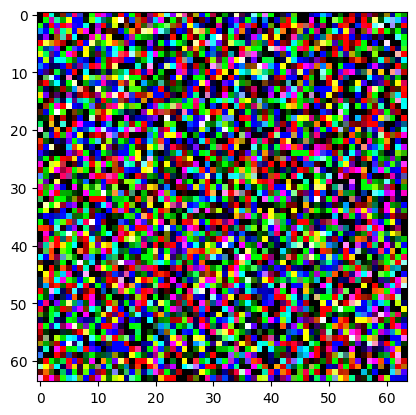

In [214]:
import matplotlib.pyplot as plt
rand_img_batch = torch.randn(size=(32, 3, 64, 64))
test_img = rand_img_batch[0]

plt.imshow(test_img.permute(1,2,0))
# #Conv2d
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1)
conv_out = conv_layer(test_img)
conv_out

In [215]:
## Max Pool 2d

max_pool_lay = nn.MaxPool2d(kernel_size=2)
print(test_img.shape)
con_test = conv_layer(test_img)
print(con_test.shape)
max_test = max_pool_lay(con_test)
max_test.shape

torch.Size([3, 64, 64])
torch.Size([10, 64, 64])


torch.Size([10, 32, 32])

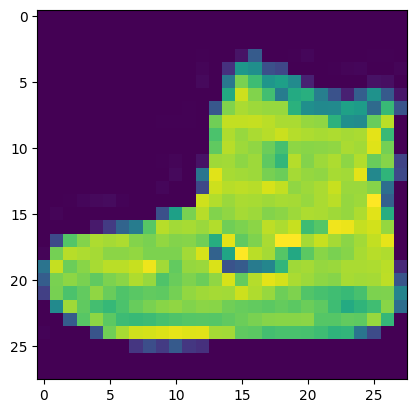

In [216]:
plt.imshow(image.squeeze())
y_clean = model_2(image.unsqueeze(dim=1))

In [217]:
# loss and optim

loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_2.parameters(), lr=.01)

In [218]:
epoch = 3

for epoch in range(epoch):
    
    loss = train_step(model=model_2, data_loader=train_load, optim=optim, loss_fn=loss_fn)
    test_metrics = test_step(model=model_2, data_loader=test_load, loss_fn=loss_fn, ac_fn=ac_fn)
    
    test_loss, test_ac = test_metrics['test_loss'], test_metrics['test_ac']
    
    print(f'Epoch {epoch} || Loss {loss} || Test Loss {test_loss} || Test ac {test_ac}')

Epoch 0 || Loss 0.4615289568901062 || Test Loss 0.48374998569488525 || Test ac 0.833025336265564
Epoch 1 || Loss 0.36576414108276367 || Test Loss 0.481258749961853 || Test ac 0.8359519243240356
Epoch 2 || Loss 0.35174813866615295 || Test Loss 0.4818463921546936 || Test ac 0.8366786241531372


In [220]:
def make_pred(model: torch.nn.Module, data:list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = sample.unsqueeze(0)
            
            # returns logits
            y_pred_logits = model(sample)
            
            # convert to prob
            y_pred_prob = torch.softmax(y_pred_logits.squeeze(), dim=0)
            
            pred_probs.append(y_pred_prob)
    return torch.stack(pred_probs)


In [222]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [223]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

torch.Size([1, 28, 28])

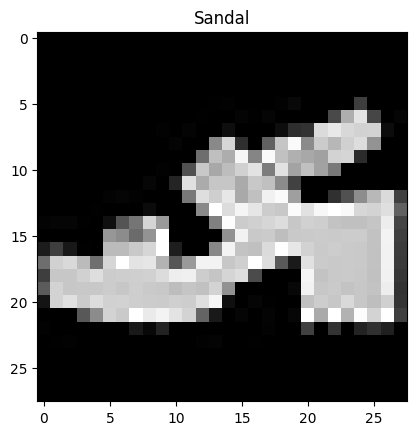

In [233]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
test_samples[0].shape

In [238]:
probs = make_pred(model=model_2, data=test_samples)
probs
final_pred = torch.argmax(probs, dim=1) 
final_pred, test_labels



(tensor([5, 1, 9, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

In [242]:
def own_ac(pred, target):
   return torch.eq(pred, torch.tensor(target)).sum() / len(pred)

own_ac(pred=final_pred, target=test_labels).item()

0.8888888955116272

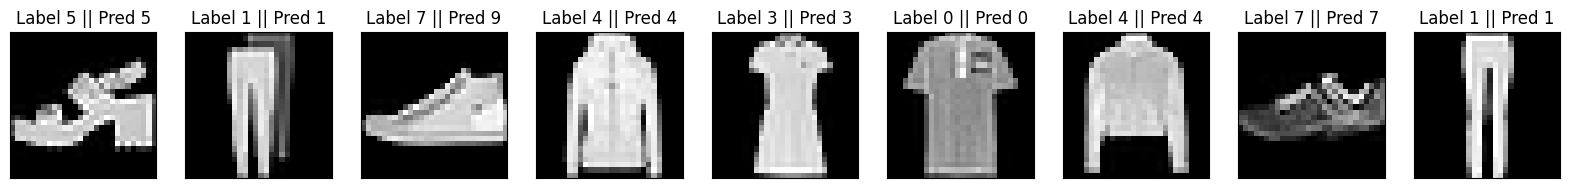

In [258]:
fig, ax = plt.subplots(1,9)
fig.set_figwidth(20)
fig.set_figheight(2)
for i in range(9):
    ax[i].set_title(f'Label {test_labels[i]} || Pred {final_pred.numpy()[i]}')
    ax[i].imshow(test_samples[i].squeeze(), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

### Make pred with trained model and vis eval

In [275]:
y_preds = []
y_targets = []

model_2.eval()
with torch.inference_mode(): 
    for X, y in tqdm(test_load, desc='making pred'):
        y_targets.append(y)
        y_pred_logits = model_2(X)
        y_pred_probs = torch.softmax(y_pred_logits, dim=1)
        y_preds.append(torch.argmax(y_pred_probs, dim=1))
        
y_preds_tensor, y_targets_tensor = torch.cat(y_preds), torch.cat(y_targets)
y_preds_tensor

making pred:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([5, 8, 2,  ..., 5, 9, 4])

In [278]:
import torchmetrics, mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [274]:
CM = ConfusionMatrix(task='multiclass', num_classes=10)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

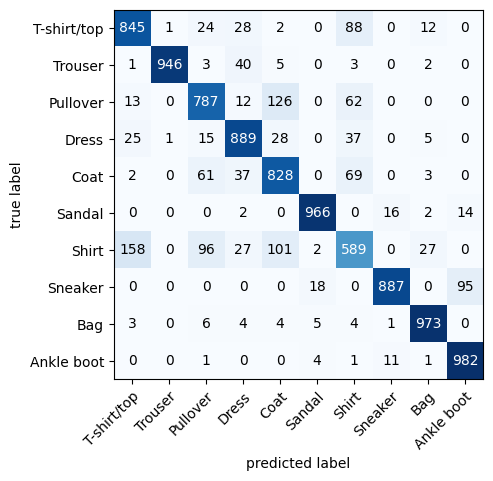

In [282]:
metrics = CM(y_preds_tensor, y_targets_tensor)
metrics
plot_confusion_matrix(conf_mat=metrics.numpy(), class_names=class_names)